<a href="https://colab.research.google.com/github/menguri/Samsung_AI_Challenge/blob/main/Samsung_AI_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Samsung AI Challenge**

# **패키지 정리**

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

!mamba install -c conda-forge rdkit
!mamba install -c conda-forge openbabel

In [ ]:
#!wget -c https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
#!chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
#!time bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local
#!time conda install -q -y -c conda-forge rdkit

In [ ]:
# SMILES 토큰화하기 위한 라이브러리 다운로드
!pip install SmilesPE

     |████████████████████████████████| 24.1 MB 2.8 kB/s 
     |████████████████████████████████| 28.5 MB 35 kB/s 
     |████████████████████████████████| 58 kB 5.4 MB/s 


In [ ]:
import sys
sys.path.append("/usr/local/lib/python3.7/site-packages")

In [ ]:
from openbabel import pybel

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
!pip install rdkit
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
from tqdm import tqdm
from openbabel import pybel
import torch
from torch import nn
from torchvision import models
from torch.utils.data import Dataset, DataLoader
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from google.colab import drive
drive.mount('/content/drive')

ERROR: Could not find a version that satisfies the requirement rdkit
ERROR: No matching distribution found for rdkit
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/fonts: skipping, no such directory
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped 

In [ ]:
print('numpy verison :', np.__version__)
print('pandas version :', pd.__version__)
print('opencv version :', cv2.__version__)
print('rdkit version :', rdkit.__version__)
print('torch version :', torch.__version__)

numpy verison : 1.19.5
pandas version : 1.1.5
opencv version : 4.1.2
rdkit version : 2021.03.5
torch version : 1.9.0+cu102


# **1. 데이터 불러오기 및 확인**

In [ ]:
path = '/content/drive/MyDrive/Data Science/Colab Notebooks/Samsung AI Challenge for Scientific Discovery/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
dev = pd.read_csv(path + 'dev.csv')
sample_submission = pd.read_csv(path + 'sample_submission.csv')

In [ ]:
train.head()

,uid,SMILES,S1_energy(eV),T1_energy(eV)
0,train_0,CCC1CCCCN1C(=O)C(C)OC(=O)c1c(C)oc(-n2cccc2)c1C#N,4.6747,3.3809
1,train_1,COc1ccc(Oc2ccc(N3C(=S)NC(c4ccccn4)C3c3cc(C)n(-...,3.6617,3.4585
2,train_2,CC(=O)Nc1ccc(C(=O)[C@H](C)Sc2nnc(C3CCCCC3)o2)cc1,3.6420,3.1787
3,train_3,OC(CNC1CC1)CN1CCc2sccc2C1,4.8901,3.7847
4,train_4,CCNC(CCCC(F)(F)F)C1(OCC)CCOCC1,6.4967,6.2724


In [ ]:
dev.head()

,uid,SMILES,S1_energy(eV),T1_energy(eV)
0,dev_0,O=C1c2ccccc2C2(c3ccccc31)c1ccccc1N(c1ccc(-c3nc...,2.7609,2.7540
1,dev_1,Cc1cccc2c3ccccc3n(-c3ccc(-c4c(-c5ccccc5)c(C#N)...,3.0495,3.0163
2,dev_2,CC1(C)c2ccccc2-c2ccc(-c3c(F)c(F)c(-c4ccc5c(c4)...,2.8314,2.1412
3,dev_3,CC(C)(C)c1ccc2c(c1)B1c3cc(C(C)(C)C)ccc3Oc3cc(-...,3.1813,2.9424
4,dev_4,O=C1c2cc(-c3ccc4c(c3)c3ccccc3n4-c3ccccc3)ccc2S...,2.9559,2.7362


In [ ]:
# 파일 정보 확인
for i in [train, test, dev]:
  print(i.info())


# img 파일 만들기 / [Baseline 참고]

#for idx, row in tqdm(test.iterrows()):
#    file = row['uid']
#    smiles = row['SMILES']
#    m = Chem.MolFromSmiles(smiles)
#    if m != None:
#        img = Draw.MolToImage(m, size=(300,300))
#        img.save(f'/content/drive/MyDrive/Data Science/Colab Notebooks/Samsung AI Challenge for Scientific Discovery/data/test_img/{file}.png')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30274 entries, 0 to 30273
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            30274 non-null  object 
 1   SMILES         30274 non-null  object 
 2   S1_energy(eV)  30274 non-null  float64
 3   T1_energy(eV)  30274 non-null  float64
dtypes: float64(2), object(2)
memory usage: 946.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   uid     602 non-null    object
 1   SMILES  602 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            71 non-null     object 
 1   SMILES         71 non-null     object

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


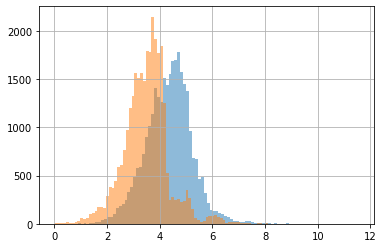

In [ ]:
train['S1_energy(eV)'].hist(bins=100, alpha=0.5)
train['T1_energy(eV)'].hist(bins=100, alpha=0.5)
plt.show()

In [ ]:
# sdf 로드를 위한 function
def sdf_load(uid, name):
  paths = os.path.join(path + f'data/{name}_sdf/{name}_{uid}.sdf')
  return paths

mols = dict()

# sdf 파일 읽어주고, mols 딕셔너리 생성 -> dataframe 생성까지 function
# 수행완료 

def dic_to_df(file, name):
  for n in tqdm(file.index):
    mol = [i for i in pybel.readfile('sdf', sdf_load(n, name))]
    if len(mol) > 0:
      mols[n] = mol[0]
  print(file)
  mols_df = pd.DataFrame().from_dict({n:v.calcdesc() for n,v in mols.items()}).transpose()
  mols_df.loc[:,'uid'] = [f'{name}_{n}' for n in mols.keys()]
  print(mols_df)
  print(name)
  df = pd.merge(file, mols_df,'outer',on='uid')
  if name == 'dev' or 'train':
    df['ST1_GAP(eV)'] = df['S1_energy(eV)'] - df['T1_energy(eV)']
  return df

def dic_to_df_for_test(file, name):
  for n in tqdm(file.index):
    mol = [i for i in pybel.readfile('sdf', sdf_load(n, name))]
    if len(mol) > 0:
      mols[n] = mol[0]
  print(file)
  mols_df = pd.DataFrame().from_dict({n:v.calcdesc() for n,v in mols.items()}).transpose()
  mols_df.loc[:,'uid'] = [f'{name}_{n}' for n in mols.keys()]
  print(mols_df)
  print(name)
  df = pd.merge(file, mols_df, 'outer', on='uid')
  return df

list = ['train', 'test', 'dev']
#df_train = dic_to_df(train, list[0])
#df_dev = dic_to_df(dev, list[2])
#df_test = dic_to_df_for_test(test, list[1])

In [ ]:
# sdf 파일을 데이터프레임에 녺였다. 
path = '/content/drive/MyDrive/Data Science/Colab Notebooks/Samsung AI Challenge for Scientific Discovery/dataframe/'

df_train = pd.read_csv(path + 'df_train.csv')
#df_train.to_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/Samsung AI Challenge for Scientific Discovery/dataframe/df_train.csv')

df_test = pd.read_csv(path + 'df_test.csv')
#df_test.to_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/Samsung AI Challenge for Scientific Discovery/dataframe/df_test.csv')

df_dev = pd.read_csv(path + 'df_dev.csv')
#df_dev.to_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/Samsung AI Challenge for Scientific Discovery/dataframe/df_dev.csv')

df_origin = pd.read_csv(path + 'df_origin.csv')
#df_origin.to_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/Samsung AI Challenge for Scientific Discovery/dataframe/df_origin.csv')

# **2. EDA & FE**

In [ ]:
#df_test 를 같이 전처리해주는게 좋을듯
df_origin

,Unnamed: 0,uid,SMILES,S1_energy(eV),T1_energy(eV),abonds,atoms,bonds,cansmi,cansmiNS,dbonds,formula,HBA1,HBA2,HBD,InChI,InChIKey,L5,logP,MP,MR,MW,nF,rotors,s,sbonds,smarts,tbonds,title,TPSA,ST1_GAP(eV)
0,0,train_0,CCC1CCCCN1C(=O)C(C)OC(=O)c1c(C)oc(-n2cccc2)c1C#N,4.6747,3.3809,10.0,53.0,55.0,NaN,NaN,2.0,NaN,30.0,7.0,0.0,NaN,NaN,NaN,3.52468,148.1122,107.1555,383.44090,0.0,7.0,NaN,42.0,NaN,1.0,NaN,88.47,1.2938
1,1,train_1,COc1ccc(Oc2ccc(N3C(=S)NC(c4ccccn4)C3c3cc(C)n(-...,3.6617,3.4585,29.0,71.0,76.0,NaN,NaN,1.0,NaN,36.0,8.0,2.0,NaN,NaN,NaN,8.21990,315.7129,176.8537,597.12636,0.0,7.0,NaN,46.0,NaN,0.0,NaN,103.87,0.2032
2,2,train_2,CC(=O)Nc1ccc(C(=O)[C@H](C)Sc2nnc(C3CCCCC3)o2)cc1,3.6420,3.1787,11.0,49.0,51.0,NaN,NaN,2.0,NaN,29.0,7.0,1.0,NaN,NaN,NaN,4.51220,187.5404,101.7412,373.46922,0.0,7.0,NaN,38.0,NaN,0.0,NaN,110.39,0.4633
3,3,train_3,OC(CNC1CC1)CN1CCc2sccc2C1,4.8901,3.7847,5.0,37.0,39.0,NaN,NaN,0.0,NaN,23.0,4.0,2.0,NaN,NaN,NaN,1.54790,100.1604,74.4465,252.37570,0.0,5.0,NaN,34.0,NaN,0.0,NaN,63.74,1.1054
4,4,train_4,CCNC(CCCC(F)(F)F)C1(OCC)CCOCC1,6.4967,6.2724,0.0,46.0,46.0,NaN,NaN,0.0,NaN,29.0,3.0,1.0,NaN,NaN,NaN,3.67370,10.2322,72.4987,297.35695,3.0,9.0,NaN,46.0,NaN,0.0,NaN,30.49,0.2243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30340,66,dev_66,N#Cc1cc(-c2ccc(N3c4ccccc4Oc4ccccc43)cc2)c(-c2c...,2.1939,2.1846,42.0,76.0,84.0,NaN,NaN,0.0,NaN,32.0,4.0,0.0,NaN,NaN,NaN,12.04496,359.8248,202.1280,642.70284,0.0,4.0,NaN,40.0,NaN,2.0,NaN,72.52,0.0093
30341,67,dev_67,CC1(C)c2ccccc2N(c2ccc(-c3nc4ccc(N5c6ccccc6C(C)...,2.3537,2.3371,59.0,123.0,135.0,NaN,NaN,0.0,NaN,58.0,2.0,0.0,NaN,NaN,NaN,17.48610,467.6751,300.7880,904.14982,0.0,5.0,NaN,76.0,NaN,0.0,NaN,35.50,0.0166
30342,68,dev_68,Cc1cc(-n2c3ccc(C(C)(C)C)cc3c3cc(C(C)(C)C)ccc32...,2.1364,2.1260,54.0,144.0,154.0,NaN,NaN,0.0,NaN,74.0,2.0,0.0,NaN,NaN,NaN,13.65020,520.8950,320.7020,938.93468,0.0,8.0,NaN,100.0,NaN,0.0,NaN,9.86,0.0104
30343,69,dev_69,Cc1cc(-n2c3ccccc3c3ccccc32)cc(C)c1B1c2ccccc2B(...,2.2650,2.2511,54.0,96.0,106.0,NaN,NaN,0.0,NaN,42.0,2.0,0.0,NaN,NaN,NaN,8.46020,481.7242,243.6220,714.50940,0.0,4.0,NaN,52.0,NaN,0.0,NaN,9.86,0.0139


In [ ]:
##1-0 히트맵을 통한 상관변수 확인

import seaborn as sns

print(df_origin.info())
print('----df_origin----')


##1-1 상관성 있는 변수만 추리기
cor = df_origin.corr()
print(cor)
print('----corr----')
basic = pd.Index(['uid', 'SMILES'])
cor_fe = cor.index[abs(cor['ST1_GAP(eV)']) >= 0.05]

corr = cor_fe.append(basic)

# cor_fe -> 나중에 test에도 적용해줘야 해.
print(corr)
print('----corr----')


##1-2 S1/T1 제거 But SMILES는 있어야 해.
df_o_corr = df_origin[corr]
# df_test도 똑같이
df_test_corr = df_test[['atoms', 'bonds', 'HBA1', 'MP', 'MR',
       'MW', 'sbonds', 'uid', 'SMILES']]

df_o_corr = df_o_corr.drop(['S1_energy(eV)', 'T1_energy(eV)'], axis=1)
print('----df_test_corr----')
df_test_corr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30345 entries, 0 to 30344
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     30345 non-null  int64  
 1   uid            30345 non-null  object 
 2   SMILES         30345 non-null  object 
 3   S1_energy(eV)  30345 non-null  float64
 4   T1_energy(eV)  30345 non-null  float64
 5   abonds         30341 non-null  float64
 6   atoms          30341 non-null  float64
 7   bonds          30341 non-null  float64
 8   cansmi         0 non-null      float64
 9   cansmiNS       0 non-null      float64
 10  dbonds         30341 non-null  float64
 11  formula        0 non-null      float64
 12  HBA1           30341 non-null  float64
 13  HBA2           30341 non-null  float64
 14  HBD            30341 non-null  float64
 15  InChI          0 non-null      float64
 16  InChIKey       0 non-null      float64
 17  L5             0 non-null      float64
 18  logP  

,atoms,bonds,HBA1,MP,MR,MW,sbonds,uid,SMILES
0,58.0,60.0,37.0,120.9150,109.4147,380.544680,52.0,test_0,COc1ccc(S(=O)(=O)NC2CCN(C3CCCCC3)CC2)c(C)c1C
1,83.0,86.0,53.0,150.1419,137.8138,428.733280,85.0,test_1,CC(CCCC1CCC2C3=C(CC[C@]12C)[C@@]1(C)CC[C@H](C)...
2,59.0,63.0,28.0,328.3890,132.8929,511.540326,37.0,test_2,C[C@@H]1C[C@@H]1c1ccc2c(c1)c(-c1ccc[nH]c1=O)c(...
3,63.0,67.0,33.0,275.6852,143.7467,497.611280,38.0,test_3,CCCn1c(=O)c2ccccc2n2c(SCC(=O)NC(Cc3ccccc3)c3cc...
4,70.0,73.0,41.0,287.7806,153.5609,589.749840,49.0,test_4,CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)OCc1cn...
...,...,...,...,...,...,...,...,...,...
597,92.0,104.0,34.0,560.9173,246.3080,764.872080,37.0,test_597,N#Cc1c(-n2c3ccccc3c3ccccc32)c(-n2c3ccccc3c3ccc...
598,88.0,96.0,42.0,318.1822,213.1560,646.820720,54.0,test_598,CC1(C)c2ccccc2N(c2ccc(-c3cc(-c4ccc(N5c6ccccc6C...
599,91.0,99.0,44.0,323.0215,218.1220,660.847300,57.0,test_599,Cc1nc(-c2ccc(N3c4ccccc4C(C)(C)c4ccccc43)cc2)cc...
600,45.0,50.0,19.0,202.4009,122.7480,392.472340,22.0,test_600,c1ccc2c(c1)Oc1ccccc1N2c1ccc(-c2nc3ccccc3s2)cc1


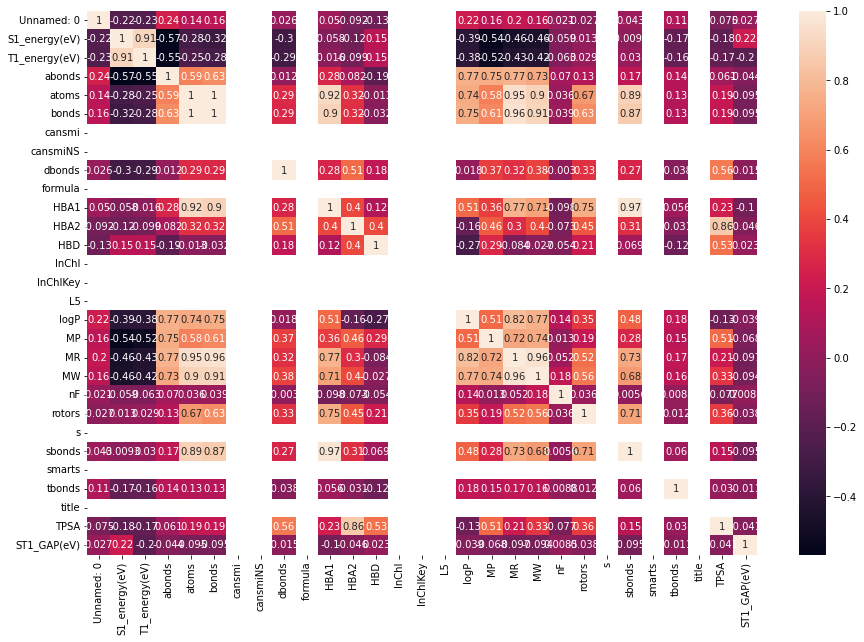

In [ ]:
#1-3 
plt.figure(figsize=(15,10))
sns.heatmap(df_origin.corr(),annot=True)

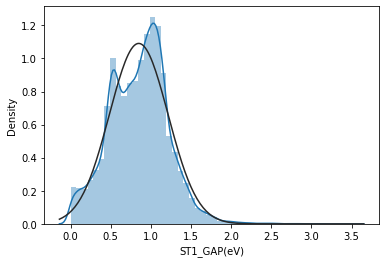

In [ ]:
##2-1 타겟변수 정규성 확보

from scipy import stats
from scipy.stats import norm

sns.distplot(df_o_corr['ST1_GAP(eV)'],fit = norm)

((array([-4.07667682, -3.86543786, -3.75005186, ...,  3.75005186,
          3.86543786,  4.07667682]),
  array([0.    , 0.    , 0.    , ..., 3.0678, 3.0689, 3.5129])),
 (0.3636304700102507, 0.8486466831438457, 0.994434611681775))

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


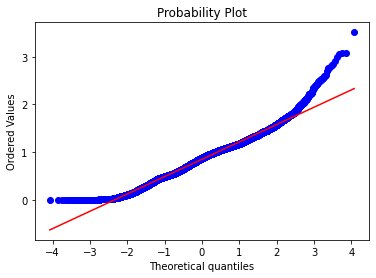

In [ ]:
##2-2 qq플롯 그리기
stats.probplot(df_o_corr['ST1_GAP(eV)'], plot=plt)

((array([-4.07667682, -3.86543786, -3.75005186, ...,  3.75005186,
          3.86543786,  4.07667682]),
  array([0.        , 0.        , 0.        , ..., 1.40310231, 1.40337269,
         1.50693996])),
 (0.20306094155283277, 0.5940592591546598, 0.9891294190479226))

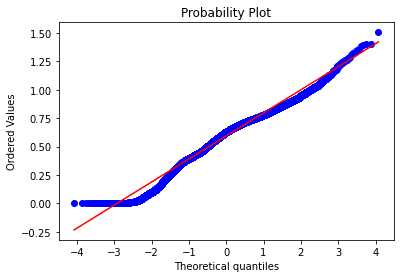

In [ ]:
#2-3 'ST1_GAP(eV)' target 값의 정규성 확보
df_o_corr['ST1_GAP(eV)'] = np.log1p(df_o_corr['ST1_GAP(eV)'])
stats.probplot(df_o_corr['ST1_GAP(eV)'], plot=plt)

In [ ]:
#2-4 타겟값 분리 / 한번에 전처리하기 위해 train과 test 합치기

# train 데이터프레임에서 타겟값 빼주기
target = df_o_corr['ST1_GAP(eV)']
# test의 list 뽑기
test_list = df_test_corr.columns
# train에 test list만 남기고 버리기
df_train = df_o_corr[test_list]
# 합치기 -> 'ST1_GAP(eV)' 자연스럽게 없어진다.
df_concat = pd.concat((df_train, df_test_corr))
# 'uid', 'SMILES' 는 박스칵스 변환 뒤에 다시 넣어주기
df_int = df_concat.select_dtypes(exclude='object')
df_index = df_concat[['uid', 'SMILES']]

In [ ]:
##3-1 변수 boxcox 변환 전 / SMILES 와 uid 를 잠시 빼줘야 한다. 

from scipy.stats import skew 

# 숫자형에만 적용
skewness = df_int.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print(skewness)
print('----------')


##3-2 박스칵스 진행
from scipy.special import boxcox1p
lam = 0.15

for feat in df_int.columns:
    df_int[feat] = boxcox1p(df_int[feat], lam)


##3-3 박스칵스 결과확인
skewness = df_int.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print(skewness)
print('----------')


##3-4 다시 합체
df_concat = pd.concat([df_index,df_int], axis=1, sort=False)
df_concat

MR        3.490877
bonds     3.273350
atoms     3.193339
MW        2.907991
HBA1      2.276071
sbonds    2.254451
MP        2.122207
dtype: float64
----------
MR        0.739679
atoms     0.568788
bonds     0.549634
MW        0.537894
sbonds    0.029809
HBA1      0.013253
MP       -0.919167
dtype: float64
----------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,uid,SMILES,atoms,bonds,HBA1,MP,MR,MW,sbonds
0,train_0,CCC1CCCCN1C(=O)C(C)OC(=O)c1c(C)oc(-n2cccc2)c1C#N,5.460736,5.527074,4.492018,7.456618,6.792434,9.612538,5.053371
1,train_1,COc1ccc(Oc2ccc(N3C(=S)NC(c4ccccn4)C3c3cc(C)n(-...,5.995517,6.123681,4.792130,9.146127,7.835009,10.728463,5.210789
2,train_2,CC(=O)Nc1ccc(C(=O)[C@H](C)Sc2nnc(C3CCCCC3)o2)cc1,5.321541,5.392276,4.437269,7.962494,6.689150,9.548490,4.882973
3,train_3,OC(CNC1CC1)CN1CCc2sccc2C1,4.838059,4.926918,4.071754,6.658122,6.084638,8.625657,4.697012
4,train_4,CCNC(CCCC(F)(F)F)C1(OCC)CCOCC1,5.210789,5.210789,4.437269,2.915825,6.034707,9.005144,5.210789
...,...,...,...,...,...,...,...,...,...
597,test_597,N#Cc1c(-n2c3ccccc3c3ccccc32)c(-n2c3ccccc3c3ccc...,6.491070,6.732788,4.697012,10.566282,8.570158,11.385618,4.838059
598,test_598,CC1(C)c2ccccc2N(c2ccc(-c3cc(-c4ccc(N5c6ccccc6C...,6.404587,6.574447,5.053371,9.164559,8.244728,10.937966,5.494161
599,test_599,Cc1nc(-c2ccc(N3c4ccccc4C(C)(C)c4ccccc43)cc2)cc...,6.469750,6.635082,5.133567,9.200333,8.296091,10.994623,5.591427
600,test_600,c1ccc2c(c1)Oc1ccccc1N2c1ccc(-c2nc3ccccc3s2)cc1,5.172535,5.357203,3.782057,8.129924,7.067094,9.669339,4.003419


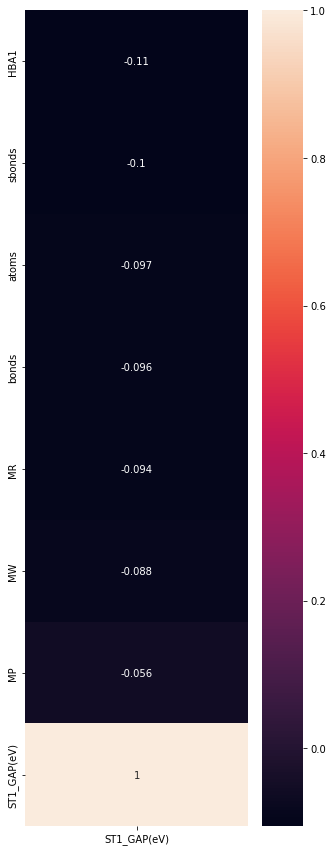

In [ ]:
#4-1 중요변수 확인 // 변수들과 에너지갭의 상관관계가 미약하다.
df_new = df_o_corr.corr()
plt.figure(figsize=(5,15))
sns.heatmap(df_new[['ST1_GAP(eV)']].sort_values(by=['ST1_GAP(eV)'],
                                ascending=True).head(30),annot=True)

In [ ]:
# train 과 test 다시 분리해주기 // dataframe 최종본
train = df_concat[:df_train.shape[0]]
train = pd.concat([train,target], axis=1, sort=False)
for x in ['atoms', 'bonds', 'HBA1', 'MP', 'MR', 'MW', 'sbonds']:
  train[x] = train[x].fillna(train[x].mean())
test = df_concat[df_train.shape[0]:]
test['MP'] = test['MP'].fillna(test['MP'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
train

,uid,SMILES,atoms,bonds,HBA1,MP,MR,MW,sbonds,ST1_GAP(eV)
0,train_0,CCC1CCCCN1C(=O)C(C)OC(=O)c1c(C)oc(-n2cccc2)c1C#N,5.460736,5.527074,4.492018,7.456618,6.792434,9.612538,5.053371,0.830210
1,train_1,COc1ccc(Oc2ccc(N3C(=S)NC(c4ccccn4)C3c3cc(C)n(-...,5.995517,6.123681,4.792130,9.146127,7.835009,10.728463,5.210789,0.184985
2,train_2,CC(=O)Nc1ccc(C(=O)[C@H](C)Sc2nnc(C3CCCCC3)o2)cc1,5.321541,5.392276,4.437269,7.962494,6.689150,9.548490,4.882973,0.380694
3,train_3,OC(CNC1CC1)CN1CCc2sccc2C1,4.838059,4.926918,4.071754,6.658122,6.084638,8.625657,4.697012,0.744505
4,train_4,CCNC(CCCC(F)(F)F)C1(OCC)CCOCC1,5.210789,5.210789,4.437269,2.915825,6.034707,9.005144,5.210789,0.202369
...,...,...,...,...,...,...,...,...,...,...
30340,dev_66,N#Cc1cc(-c2ccc(N3c4ccccc4Oc4ccccc43)cc2)c(-c2c...,6.123681,6.314735,4.597157,9.458462,8.126945,10.921135,4.969939,0.009257
30341,dev_67,CC1(C)c2ccccc2N(c2ccc(-c3nc4ccc(N5c6ccccc6C(C)...,7.071285,7.262963,5.622899,10.103583,9.032046,11.843776,6.123681,0.016464
30342,dev_68,Cc1cc(-n2c3ccc(C(C)(C)C)cc3c3cc(C(C)(C)C)ccc32...,7.397498,7.538898,6.073289,10.376340,9.183243,11.948777,6.654950,0.010346
30343,dev_69,Cc1cc(-n2c3ccccc3c3ccccc32)cc(C)c1B1c2ccccc2B(...,6.574447,6.770766,5.053371,10.178046,8.545220,11.202366,5.426781,0.013804


In [ ]:
test

,uid,SMILES,atoms,bonds,HBA1,MP,MR,MW,sbonds
0,test_0,COc1ccc(S(=O)(=O)NC2CCN(C3CCCCC3)CC2)c(C)c1C,5.622899,5.684507,4.838059,7.036386,6.834235,9.594083,5.426781
1,test_1,CC(CCCC1CCC2C3=C(CC[C@]12C)[C@@]1(C)CC[C@H](C)...,6.291711,6.360100,5.460736,7.485289,7.305818,9.886786,6.337529
2,test_2,C[C@@H]1C[C@@H]1c1ccc2c(c1)c(-c1ccc[nH]c1=O)c(...,5.653921,5.773773,4.380946,9.239484,7.230375,10.330164,4.838059
3,test_3,CCCn1c(=O)c2ccccc2n2c(SCC(=O)NC(Cc3ccccc3)c3cc...,5.773773,5.887419,4.647709,8.828870,7.393810,10.260063,4.882973
4,test_4,CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)OCc1cn...,5.968981,6.047664,5.012077,8.928641,7.532854,10.696114,5.321541
...,...,...,...,...,...,...,...,...,...
597,test_597,N#Cc1c(-n2c3ccccc3c3ccccc32)c(-n2c3ccccc3c3ccc...,6.491070,6.732788,4.697012,10.566282,8.570158,11.385618,4.838059
598,test_598,CC1(C)c2ccccc2N(c2ccc(-c3cc(-c4ccc(N5c6ccccc6C...,6.404587,6.574447,5.053371,9.164559,8.244728,10.937966,5.494161
599,test_599,Cc1nc(-c2ccc(N3c4ccccc4C(C)(C)c4ccccc43)cc2)cc...,6.469750,6.635082,5.133567,9.200333,8.296091,10.994623,5.591427
600,test_600,c1ccc2c(c1)Oc1ccccc1N2c1ccc(-c2nc3ccccc3s2)cc1,5.172535,5.357203,3.782057,8.129924,7.067094,9.669339,4.003419


# **3. SMILES - 전처리**

In [ ]:
# 전처리1 - 토큰화
from SmilesPE.pretokenizer import atomwise_tokenizer

train_smiles = train.SMILES.values.tolist()
smiles = []
for i in train_smiles:
  tok = atomwise_tokenizer(i)
  smiles.append(tok)

len(smiles)

30345

In [ ]:
# 전처리2 - 정수인코딩
from tensorflow.keras.preprocessing.text import Tokenizer

# vocab
tokenizer = Tokenizer()
tokenizer.fit_on_texts(smiles)
print(tokenizer.word_index)
print(tokenizer.word_counts)

# txt2seq
txt2seq = tokenizer.texts_to_sequences(smiles)

{'c': 1, '(': 2, ')': 3, '1': 4, 'n': 5, 'o': 6, '2': 7, '=': 8, '3': 9, 'f': 10, 's': 11, '4': 12, '-': 13, 'cl': 14, '/': 15, '5': 16, '[c@h]': 17, '[c@@h]': 18, '#': 19, '[nh]': 20, 'br': 21, '[n+]': 22, '6': 23, '[o-]': 24, '\\': 25, '7': 26, '[b-]': 27, '[si]': 28, 'i': 29, 'p': 30, '[c@]': 31, '[c@@]': 32, '8': 33, 'b': 34, '9': 35, '[n-]': 36, '[o+]': 37, '[nh+]': 38, '[c-]': 39, '%10': 40, '[sih]': 41, '[s@]': 42, '%11': 43, '[13ch]': 44, '[sih3]': 45, '[sih2]': 46, '[s@@]': 47, '[nh2+]': 48, '%12': 49, '[13c]': 50, '[nh3+]': 51, '[p@@]': 52, '%13': 53, '[s-]': 54, '[b]': 55, '[p+]': 56, '[p-]': 57, '[c+]': 58, '%14': 59, '[ih2]': 60, '[124i]': 61, '[3h]': 62, '[p@]': 63, '[ph]': 64, '[13ch3]': 65, '[ch]': 66, '[14ch]': 67, '[bh3-]': 68}
OrderedDict([('c', 564371), ('1', 82800), ('n', 72841), ('(', 129311), ('=', 48180), ('o', 71702), (')', 129311), ('-', 8246), ('2', 55642), ('#', 2991), ('3', 25232), ('s', 10733), ('4', 9398), ('cl', 5708), ('[c@h]', 3306), ('f', 11827), ('br

In [ ]:
# 전처리3 - 패딩
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = max(len(item) for item in txt2seq)
print(max_len)

txt2seq = pad_sequences(txt2seq, padding = 'post', maxlen = 30)
txt2seq.shape

100


(30345, 30)

In [ ]:
# 전처리 - test

test_smiles = test.SMILES.values.tolist()
smiles = []
for i in test_smiles:
  tok = atomwise_tokenizer(i)
  smiles.append(tok)

# txt2seq
txt2seq_test = tokenizer.texts_to_sequences(smiles)

max_len = max(len(item) for item in txt2seq_test)
print(max_len)

# padding
txt2seq_test = pad_sequences(txt2seq_test, padding = 'post', maxlen = 30)
print(txt2seq_test.shape)
txt2seq_test

515
(602, 30)


array([[ 8,  6,  3, ...,  1,  4,  1],
       [ 2,  1,  3, ...,  1,  3,  6],
       [ 8,  6,  3, ...,  1,  4, 10],
       ...,
       [12,  1,  1, ...,  3,  5,  4],
       [ 1,  1,  1, ...,  1,  1,  4],
       [ 1,  1, 26, ...,  1,  1,  4]], dtype=int32)

In [ ]:
# label 데이터 뽑아주기
label = train['ST1_GAP(eV)'].values
label = label.reshape(30345,)
label.shape

(30345,)

In [ ]:
# 총 데이터

# 1. train
# 2. test
# 3. target
# 4. txt2seq
# 5. txt2seq_test
# 6. label

# **Modeling : LSTM - SMILES NLP**

In [ ]:
# 데이터셋 Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(txt2seq, label, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24276, 30)
(6069, 30)
(24276,)
(6069,)


In [ ]:
# 데이터 3차원 변환
# x_train = x_train.reshape(x_train.shape[0], 265, 1)
# x_test = x_test.reshape(x_test.shape[0], 265, 1)

# test도 마찬가지
# txt2seq_test = txt2seq_test.reshape(txt2seq_test.shape[0], 265, 1)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from keras.callbacks import EarlyStopping
import keras.backend as K
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [ ]:
K.clear_session()

model = Sequential() # Sequeatial Model 

model.add(Embedding(1000,32))
model.add(LSTM(8)) # (timestep, feature) 
model.add(Dense(1, activation='linear')) # output = 1 
model.summary()
#model.fit(x_train, y_train, epochs=1, verbose=1, callbacks=[early_stop])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam') 
history = model.fit(x_train, y_train, epochs=5, verbose=1, callbacks=[early_stop])

Epoch 1/5
759/759 [==============================] - 13s 15ms/step - loss: 0.0488
Epoch 2/5
759/759 [==============================] - 11s 15ms/step - loss: 0.0421
Epoch 3/5
759/759 [==============================] - 11s 14ms/step - loss: 0.0420
Epoch 4/5
759/759 [==============================] - 11s 14ms/step - loss: 0.0419
Epoch 5/5
759/759 [==============================] - 11s 15ms/step - loss: 0.0419


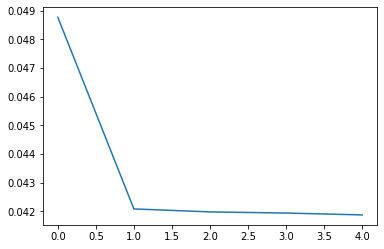

In [ ]:
plt.plot(history.history['loss'])
plt.show()

In [ ]:
# 모델 저장

import os

model_name = 'keras_naver_review_trained_model.h5'

# Save model and weights
model_path = os.path.join('/content/drive/MyDrive/Data Science/Colab Notebooks/Samsung AI Challenge for Scientific Discovery/', model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/MyDrive/Data Science/Colab Notebooks/Samsung AI Challenge for Scientific Discovery/keras_naver_review_trained_model.h5 


In [ ]:
# 모델 test 예측

pred_out = model.predict(txt2seq_test)

predict = []
for i in pred_out:
  i = i.tolist()
  i = i[0]
  predict.append(i)

predict

In [ ]:
# submission = pd.DataFrame({
#     "uid" : test['uid'],
#     "ST1_GAP(eV)" : np.expm1(predict)
# })

# submission.head()
# submission.to_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/Samsung AI Challenge for Scientific Discovery/submission.csv', index=False)

# **Modeling 2차 - SDF + Smiles 예측값**

In [ ]:
train_model = train.drop(['uid', 'SMILES', 'ST1_GAP(eV)'], axis=1)
test_model = test.drop(['uid', 'SMILES'], axis=1)

In [ ]:
# 0단계 - datafrmae -> array
train_model_a = train_model.values
target_a = target.ravel()
test_model_a = test_model.values

# 1단계 - 훈련 셋, 테스트 셋 분할
#훈련-테스트 분할// 분류문제가 아니므로 stratify=y 설정은 뺀다.
x_train_all, x_test, y_train_all, y_test = train_test_split(train_model_a, target_a, test_size=0.2, random_state=42)

print(len(x_train_all))
print(len(x_test))
print(len(y_train_all))
print(len(y_test))

24276
6069
24276
6069


In [ ]:
# RandomForest 파라미터 튜닝 / 130점, 387등

from sklearn.ensemble import RandomForestClassifier
Ran = RandomForestRegressor()
ran_params = { 'n_estimators' : [10,100],
           'max_depth' : [8,12],
           'min_samples_leaf' : [8,10],
           'min_samples_split' : [8,10]
            }
grid_cv = GridSearchCV(Ran, param_grid = ran_params, cv = kfold, n_jobs = -1)
grid_cv.fit(x_train_all,y_train_all)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.1165


In [ ]:
ran_predict = grid_cv.predict(test_model_a)

submission = pd.DataFrame({
    "uid" : test['uid'],
    "ST1_GAP(eV)" : np.expm1(ran_predict)
})

submission.head()
submission.to_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/Samsung AI Challenge for Scientific Discovery/ubmission.csv', index=False)

## **FeedBack**

**(1) 딥러닝에 대한 깊은 이해가 필요하다. 기본적으로 어떻게 굴러가는지 제대로 이해하고 접근할 것.**

**(2) 한번도 해보지 않은 대회, 공모전은 성급하게 참가하지 말 것. 먼저 공부하고 시작하자.**

**(3) 공부 -> 과제 접근**

**(4) 딥러닝을 단순히 라이브러리처럼 쓰는 것이 아니라 내 마음대로 구성하고 굴러가도록 연습하자.**

**(5) Smiles를 어떻게 접근해야 할지 모르겠다.**

**(6) 다중분류, 다중회귀부터 공부하고 NLP 접근하는것을 추천.**